In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
valores = pd.read_csv("./dados/sp_ka.csv").valor

529900

Text(0.5, 1.0, 'Histograma de Preços')

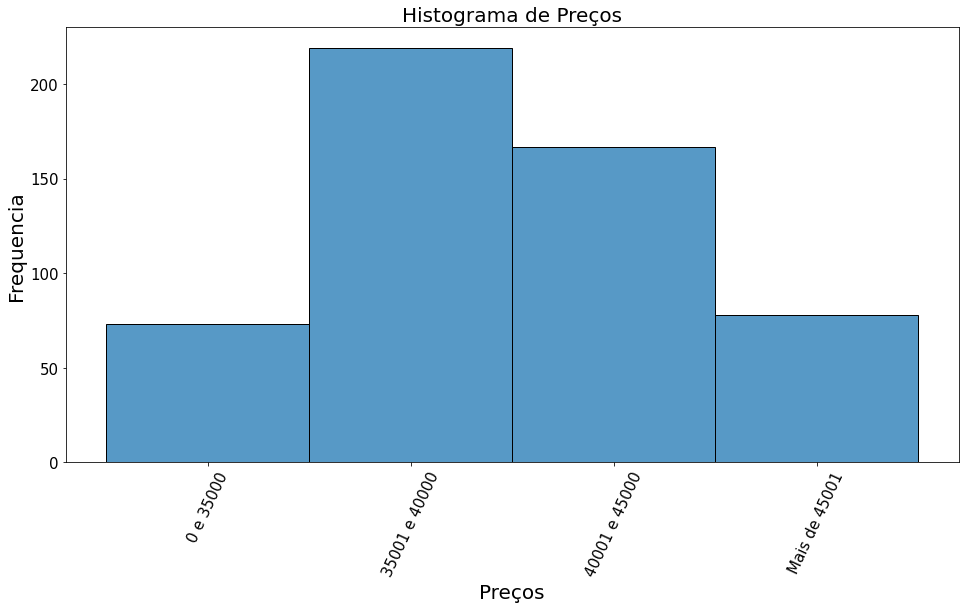

In [62]:
bins = [0, 35000, 40000, 45000, 90000]
labels = ['0 e 35000', '35001 e 40000','40001 e 45000','Mais de 45001']

valores_hist = pd.cut(valores, bins,
                      labels=labels, include_lowest=True)

plt.rc('legend', fontsize=15)
plt.rcParams['font.size'] = '15'

plt.figure(figsize=(16, 8))
sns.histplot(data=valores_hist, binwidth=3)
# valores.hist(grid=False)
plt.xticks(rotation=65)
plt.xlabel('Preços', fontsize=20)
plt.ylabel('Frequencia', fontsize=20)
plt.title('Histograma de Preços', fontsize=20)


In [74]:
file = "sp_fit"
colnames = ['Loss']
train_losses = pd.read_csv(
    f'./resultados/{file}/train_loss_epoch_{file}.csv', names=colnames, header=None)
test_losses = pd.read_csv(
    f'./resultados/{file}/test_loss_epoch_{file}.csv', names=colnames, header=None)
dif_train = pd.read_csv(
    f'./resultados/{file}/train_loss_{file}.csv', names=colnames, header=None)
dif_test = pd.read_csv(
    f'./resultados/{file}/test_loss_{file}.csv', names=colnames, header=None)



In [75]:
dif_array = []
for index, row in dif_train.iterrows():
    dif_array.append(round(float(row.Loss), 2))

temp = []
for index, row in dif_test.iterrows():
    temp.append(round(float(row.Loss), 2))

dif_train = pd.DataFrame({"Loss": dif_array})
dif_test = pd.DataFrame({"Loss": temp})
dif = pd.concat([dif_train, dif_test])

In [76]:
dif_array.sort(reverse=True)
print(dif_array[0])
x = 0
bins = []
labels = []
while (True):
    string = f"Entre {x+1} e "
    bins.append(x)
    if(x > dif_array[0]):
        break
    x += 2000
    string += f"{x}"
    labels.append(string)


pd.cut(dif.Loss, bins,
       labels=labels, include_lowest=True).value_counts()

print(bins)
print(labels)

60958.77
[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 22000, 24000, 26000, 28000, 30000, 32000, 34000, 36000, 38000, 40000, 42000, 44000, 46000, 48000, 50000, 52000, 54000, 56000, 58000, 60000, 62000]
['Entre 1 e 2000', 'Entre 2001 e 4000', 'Entre 4001 e 6000', 'Entre 6001 e 8000', 'Entre 8001 e 10000', 'Entre 10001 e 12000', 'Entre 12001 e 14000', 'Entre 14001 e 16000', 'Entre 16001 e 18000', 'Entre 18001 e 20000', 'Entre 20001 e 22000', 'Entre 22001 e 24000', 'Entre 24001 e 26000', 'Entre 26001 e 28000', 'Entre 28001 e 30000', 'Entre 30001 e 32000', 'Entre 32001 e 34000', 'Entre 34001 e 36000', 'Entre 36001 e 38000', 'Entre 38001 e 40000', 'Entre 40001 e 42000', 'Entre 42001 e 44000', 'Entre 44001 e 46000', 'Entre 46001 e 48000', 'Entre 48001 e 50000', 'Entre 50001 e 52000', 'Entre 52001 e 54000', 'Entre 54001 e 56000', 'Entre 56001 e 58000', 'Entre 58001 e 60000', 'Entre 60001 e 62000']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


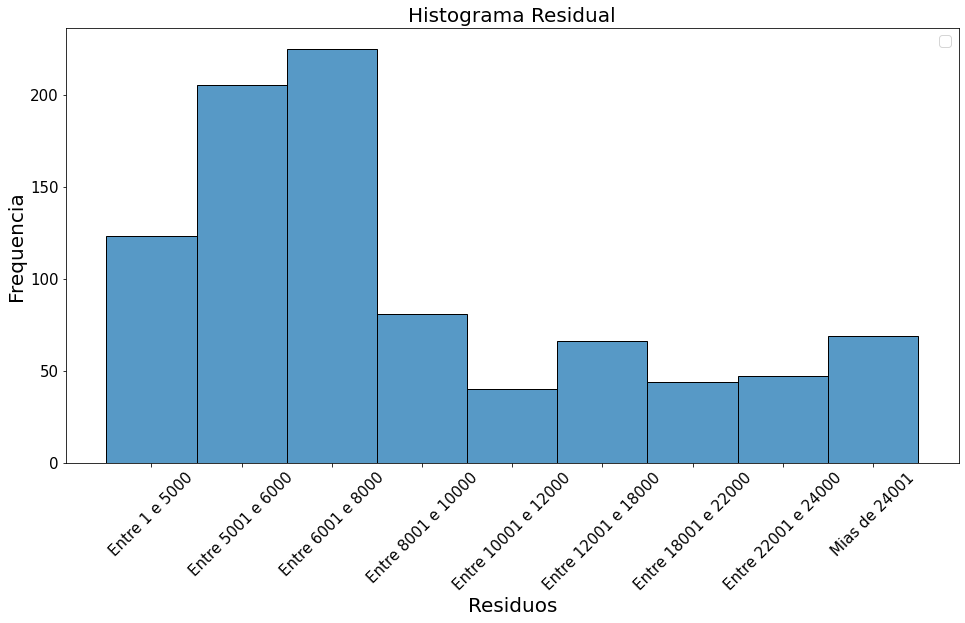

In [83]:
bins = [0, 5000, 6000, 8000, 10000, 12000,
        18000, 22000, 24000, 62000]
labels = ['Entre 1 e 5000', 'Entre 5001 e 6000', 'Entre 6001 e 8000', 'Entre 8001 e 10000', 'Entre 10001 e 12000',
          'Entre 12001 e 18000', 'Entre 18001 e 22000', 'Entre 22001 e 24000', 'Mias de 24001']

dif_hist = pd.cut(dif.Loss, bins,
                  labels=labels, include_lowest=True)

plt.rc('legend', fontsize=15)
plt.rcParams['font.size'] = '15'

plt.figure(figsize=(16, 8))
sns.histplot(data=dif_hist, binwidth=3)
plt.xticks(rotation=45)
plt.xlabel('Residuos', fontsize=20)
plt.ylabel('Frequencia', fontsize=20)
plt.title('Histograma Residual', fontsize=20)
plt.legend()
